# Arquiecturas populares para CNN.
## LeNet 5 (1988)
La red LetNet (LeCun) aparece, como dice la fecha en 1988.
[Yan LeCun](https://es.wikipedia.org/wiki/Yann_LeCun) es el inventor de la red LeNet.

Por que es importante? Mostro como la "backpropagation" fue efectiva en resolver el problema del
[MNIST](https://en.wikipedia.org/wiki/MNIST_database)
adiminstrado por Yan Lecun.

Para explicar la arquitectura de esta red introducimos una grafica.






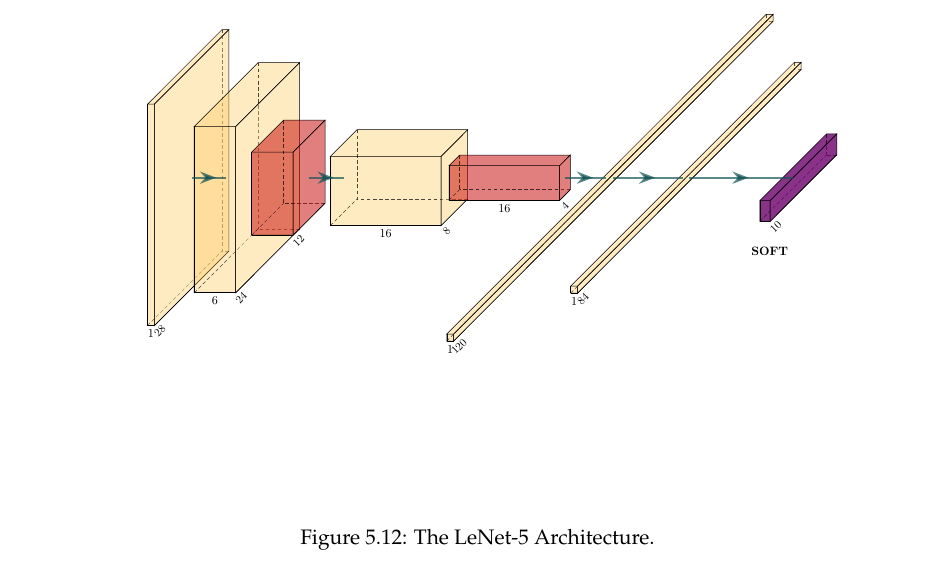

La arquitectura (topologia) la describimos como esta en la grafica.

En general tiene:

* 3 redes convolucionales.
* 2 redes de pooling (average pooling layers)
* 1 Fully connected (dense) layer, luego de "flattering"
* El clasificador "softmax" (digitos del 0 al 9).

Hay muchos sitios donde se puede entender esta arquitectura, pero, igual, aca la vemos con detalles.

Vamos al detalle:

* **L0**: datos de entrada $28 \times 28 \times 1$, del MNIST database.

* **L1**: primera capa convolutiva, se conoce como C1, tiene un kernel de $5 \times 5$, no padding, stride $s=1$.
La salida tendria los tamanos $(28-5+1) \times (28-5+1)=24 \times 24 \times 6 $. Se usan 6 filtros de salida. Contar parametros es importante para control de calidad en el proceso y estimar que tan costosa es la red.


$$\text{training parameters} = (5 \times 5 \times 1 + 1 )\times 6 = 156 .$$
La original usa tanh como funcion de activacion. Aca, nosotros vamos a usar ReLU por que es mas precisa.

* **L1P** : pooling conocida tambien como S2. Es un "average" con 6 filtros de salida y kernel $2 \times 2$. Stris $s=2$, de forma que el tamanho es
$$ \text{# feature maps} = \left [ \frac{24-2}{2}  +1 \right ] \times \left [ \frac{24 - 2}{2} + 1\right ] \times 6= 12 \times 12 \times 6.$$
El pooling no tiene parametros.
* **L2**: (convolucion C2): Esta capa tiene un kernel de $5 \times 5$ y 16 filtros. No padding, strides $s=1$. El tamano de salida es $(12-5+1) \times (12-5+1) \times 16 = 8 \times 8 \times 16$. Contamos el numero de parametros, asumiendo que tenemos una salida de 16 filtros.
$$ \text{training parameters} = (5 \times 5 \times 6 +1) \times 16 = 2416 .$$
* **L2P**: Otro pooling de promedio (P2). Kernel $2 \times 2$, stride $s=2$ con 16 (feature maps). La salida se reduce a:
$4 \times 4 \times 16$.

* **L3**: la ultima capa convolucional (C3). Fitro es $4 \times 4$
con 120 filtros de salidas. No padding y $s=1$. La salida tiene un tamano de $1 \times 1 \times 120$.
Contemos parametros
$$\text{training parameters}= (4 \times 4 \times 16 +1) \times 120  =  30848 .$$
La salida tiene 84 (feature maps, filtros). Si contamos parametros
$$\text{training parameteres}=(120+1) \times 84 =10164.$$

* **L4**: por ultimo viene la capa clasificadora. Tambien es "fully connected" pero la salida es 10 (usa una activacion softmax. Todas anteriores son ReLU).
El numero de parametros es

$$(84+1) \times 10 = 850.$$

Esta fue toda la arquitectura, la implementacion la hacemos con el "framework" TensorFlow, y las librerias de Keras.



In [ ]:
import keras
from  keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Conv2D, AvgPool2D, Flatten, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from keras.utils import plot_model


In [ ]:
# cargamos los datos del MNIST y hacemos un "split" en train y test
(train_x, train_y), (test_x, test_y) = mnist.load_data()


In [ ]:
# verficicacion (QC)
print("el tamano de entrenamiento en x es {}".format(train_x.shape))
print("el tamano de entrenamiento en y es {}".format(train_y.shape))
print("el tamano de preueba en x es {}".format(test_x.shape))
print("el tamano de preueba en y es {}".format(test_y.shape))

el tamano de entrenamiento en x es (60000, 28, 28)
el tamano de entrenamiento en y es (60000,)
el tamano de preueba en x es (10000, 28, 28)
el tamano de preueba en y es (10000,)


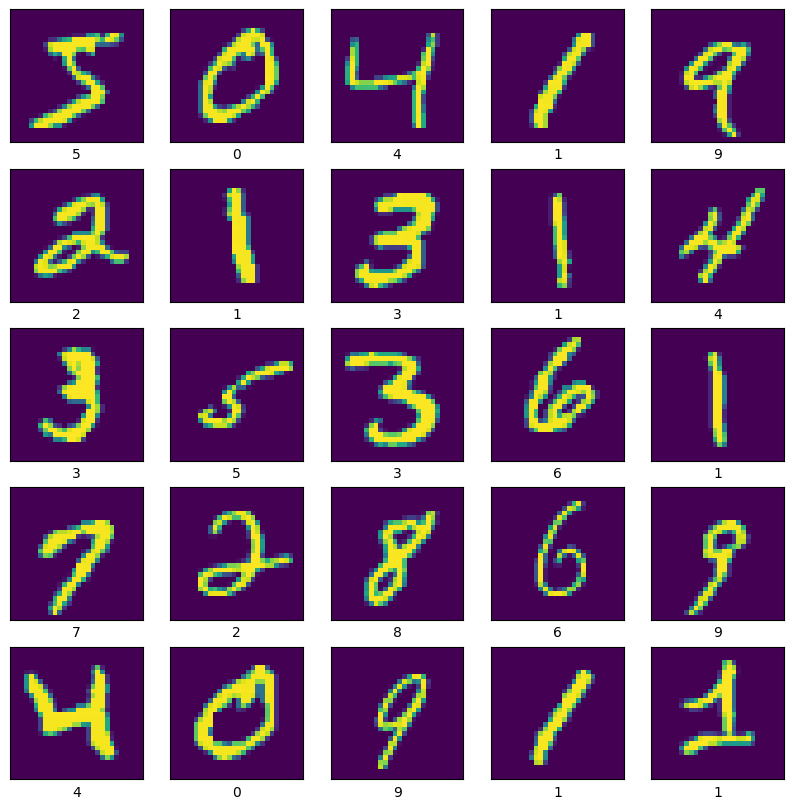

In [ ]:
# graficamos los datos
import matplotlib.pyplot as plt
import numpy as np
plt.figure(figsize=(10,10))

# graficamos
nI=25
for i in range(nI):
    plt.subplot(5,5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_x[i])

    # muestre las etiquetas
    xlabel = "{0}".format(train_y[i])
    plt.xlabel(xlabel)


In [ ]:
# cuales las dimensiones de los datos
train_x.shape

(60000, 28, 28)

In [ ]:
i# preprocesameinto para convertir los datos a un tensor de rango 4
train_x = train_x.reshape(train_x.shape[0],28,28,1)
test_x = test_x.reshape(test_x.shape[0],28,28,1)


In [ ]:
test_x.shape

(10000, 28, 28, 1)

In [ ]:
# normalizacion. Los pixeles estan entre 0 y 255 (4 bits)
# dividmos todo por 255 y quedan entre 0 y 1
train_x = train_x/255.0
test_x = test_x/255.0


In [ ]:
# one hot encoding de las etiquetas.
train_y = to_categorical(train_y, num_classes=10)
test_y = to_categorical(test_y, num_classes=10)

In [ ]:
# construccion de la arquitectura con Keras
model = Sequential()

# primera convolucion
model.add(Conv2D(filters=6,
                 kernel_size=5,
                 strides=1,
                 activation="relu",
                 input_shape=(28, 28, 1)
                 ))

# seguna capa. Pooling 2x2 stride 2 padding 0
model.add(AvgPool2D(pool_size=(2,2)))


# tercera capa. Convolucion 5 x 5, salida 16 feature maps
model.add(Conv2D( filters=16,
                 kernel_size=(5,5),
                  activation='relu'))

# otro pooling de 2x2 stride 2
model.add(AvgPool2D(pool_size=(2,2)))

# el LeNet-5 original tiene la convolucion como la explique arriba.
# aca no hacemos la convolucion sino que corremos la instruccion "Flatten()"
model.add(Flatten())


# viene la capa densa, MLP, 120
model.add( Dense(120, activation='relu'))

# otra densa de 84
model.add( Dense(84, activation='relu'))

# la capa clasificatoria, final activacion softmax
model.add(Dense(10, activation='softmax'))
model.summary()





Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 24, 24, 6)         156       
                                                                 
 average_pooling2d (Average  (None, 12, 12, 6)         0         
 Pooling2D)                                                      
                                                                 
 conv2d_1 (Conv2D)           (None, 8, 8, 16)          2416      
                                                                 
 average_pooling2d_1 (Avera  (None, 4, 4, 16)          0         
 gePooling2D)                                                    
                                                                 
 flatten (Flatten)           (None, 256)               0         
                                                                 
 dense (Dense)               (None, 120)               3

In [ ]:
# no hemos acabado, tenemos que agragar el entrenamiento y definir como se entrena
model.compile(loss='categorical_crossentropy', optimizer=Adam(), metrics="accuracy")
history=model.fit(train_x, train_y, batch_size=128, epochs=20, verbose=1, validation_data=(test_x, test_y))

Epoch 1/20
469/469 [==============================] - 22s 44ms/step - loss: 0.3789 - accuracy: 0.8882 - val_loss: 0.1367 - val_accuracy: 0.9594
Epoch 2/20
469/469 [==============================] - 15s 31ms/step - loss: 0.1141 - accuracy: 0.9657 - val_loss: 0.0775 - val_accuracy: 0.9776
Epoch 3/20
469/469 [==============================] - 15s 31ms/step - loss: 0.0843 - accuracy: 0.9746 - val_loss: 0.0570 - val_accuracy: 0.9827
Epoch 4/20
469/469 [==============================] - 16s 33ms/step - loss: 0.0664 - accuracy: 0.9798 - val_loss: 0.0547 - val_accuracy: 0.9815
Epoch 5/20
469/469 [==============================] - 14s 30ms/step - loss: 0.0572 - accuracy: 0.9819 - val_loss: 0.0487 - val_accuracy: 0.9848
Epoch 6/20
469/469 [==============================] - 15s 31ms/step - loss: 0.0494 - accuracy: 0.9845 - val_loss: 0.0489 - val_accuracy: 0.9856
Epoch 7/20
469/469 [==============================] - 15s 32ms/step - loss: 0.0422 - accuracy: 0.9865 - val_loss: 0.0473 - val_accuracy:

In [ ]:
# displaying the results
# este lo piratie de algun lado y no recuerdo.
def plot_example(X, y, y_pred=None):

    # 9, 3x3 plots
    fig, axes = plt.subplots(3,3)
    fig.set_size_inches(10,10)
    fig.subplots_adjust(hspace=0.3, wspace=0.3)

    X, y = X[:9, ... , 0], y[:9]

    for i, ax in enumerate(axes.flat):
        # grafique la imagen
        ax.imshow(X[i])

        # muestre etiqueta
        xlabel = "{0}, Pred:{1}".format(y[i], y_pred[i])

        # muestre la etiqueta en el eje x
        ax.set_xlabel(xlabel)

        # remueva ticks
        ax.set_xticks([])
        ax.set_yticks([])

    plt.show()


In [ ]:
# evaluacion final
score = model.evaluate(test_x, test_y)
print("Test Loss", score[0])
print("Test accuracy", score[1])


313/313 [==============================] - 1s 4ms/step - loss: 0.0453 - accuracy: 0.9886
Test Loss 0.045329149812459946
Test accuracy 0.9886000156402588


In [ ]:
# salvamos el modelo
model.save("lenet5_model.h5")

313/313 [==============================] - 1s 4ms/step


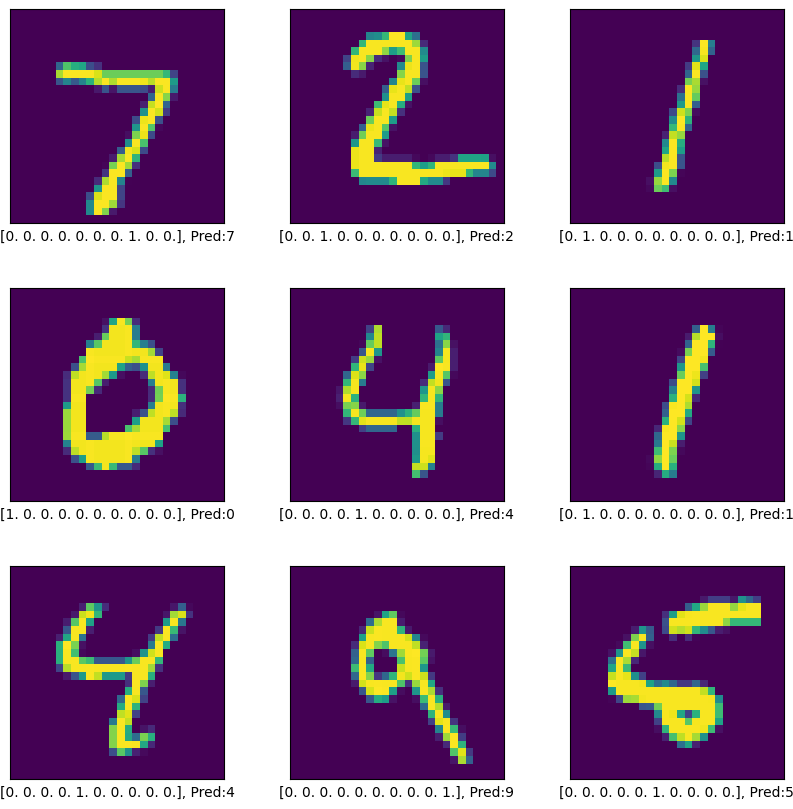

In [ ]:
# mas chequeo
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

model = tf.keras.models.load_model("lenet5_model.h5")

# predicciones
predictions = model.predict(test_x)

# indices de las predicciones
pred_y = np.argmax(predictions, axis = 1)

# graficamos
plot_example(test_x, test_y, pred_y)

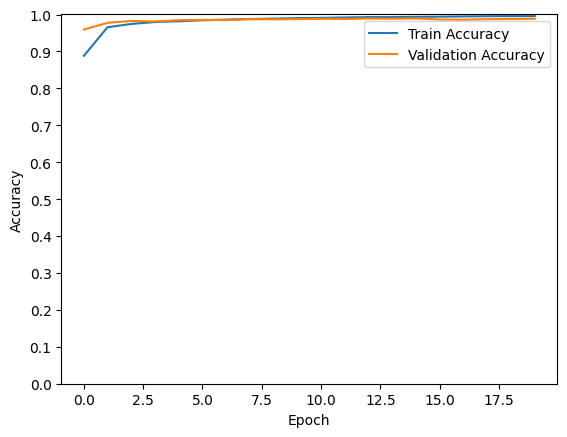

In [ ]:
# final evaluation
def plot_history(history):
    plt.figure()
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.plot(history.epoch, np.array(history.history['accuracy']),
         label='Train Accuracy')
    plt.plot(history.epoch, np.array(history.history['val_accuracy']),
         label = 'Validation Accuracy')
    plt.legend()
     #plt.ylim([0, 1.5])
    plt.yticks([0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1])
    plt.savefig("accuracymnist.pdf")

plot_history(history)